<a href="https://colab.research.google.com/github/arifroska/PrakAPM/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving avg_rainfalltemp in UK - Sheet1.csv to avg_rainfalltemp in UK - Sheet1.csv


In [ ]:
#membaca data
import io
import pandas as pd
data = pd.read_csv(io.BytesIO(uploaded['avg_rainfalltemp in UK - Sheet1.csv']))
data.head()

,Year,Type of period,Period,Avg rainfall(in mm),Avg temp(in centigrade)
0,2010,Monthly,JAN,69.5,0.8
1,2010,Monthly,FEB,71.7,1.6
2,2010,Monthly,MAR,65.1,5.5
3,2010,Monthly,APR,21.4,8.2
4,2010,Monthly,MAY,22.1,9.8


In [ ]:
#melakukan grouping data berdasarkan tahun dan memilih data yang akan digunakan
data_group = data[['Year','Avg rainfall(in mm)', 'Avg temp(in centigrade)']].groupby('Year').mean().sort_values(by='Year').reset_index()
data_group = data_group.rename(columns={'Avg rainfall(in mm)': 'Curah_Hujan', 'Avg temp(in centigrade)': 'Temperatur'})
print (data_group)

   Year  Curah_Hujan  Temperatur
0  2010   133.017647    8.192941
1  2011   114.676471    9.709412
2  2012   181.041176    8.818824
3  2013   127.488235    8.770588
4  2014   147.605882   10.017059
5  2015   138.800000    9.267647
6  2016   143.794118    9.411765
7  2017   132.035294    9.720588
8  2018   126.505882    9.573529
9  2019   160.441176    9.520000


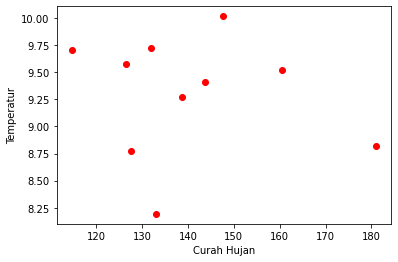

In [ ]:
#menampilkan data asli dengan scatter plot -> perbandingan antara curah hujan dan temperature
import matplotlib.pyplot as plt

%matplotlib inline
plt.xlabel('Curah Hujan')
plt.ylabel('Temperatur')
plt.scatter(data_group.Curah_Hujan, data_group.Temperatur, color='red')

In [ ]:
x = data_group[['Curah_Hujan', 'Year']]
y = data_group['Temperatur']

In [ ]:
#membagi data train dan data test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

In [ ]:
#melakukan proses regresi
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: -0.17755867414976434
intercept: -427.5048855986112
slope: [-0.00147092  0.21684848]


In [ ]:
#mencari nilai prediksi dari data test
y_pred = model.predict(x_test)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 8.52795614  9.90926407  9.01083374 10.07619644  8.40872484]


In [ ]:
#membandingkan nilai asli dan prediksi
baru = pd.DataFrame({'Nilai asli' : y_test, 'Nilai Prediksi' : y_pred})
baru

,Nilai asli,Nilai Prediksi
2,8.818824,8.527956
8,9.573529,9.909264
4,10.017059,9.010834
9,9.520000,10.076196
1,9.709412,8.408725


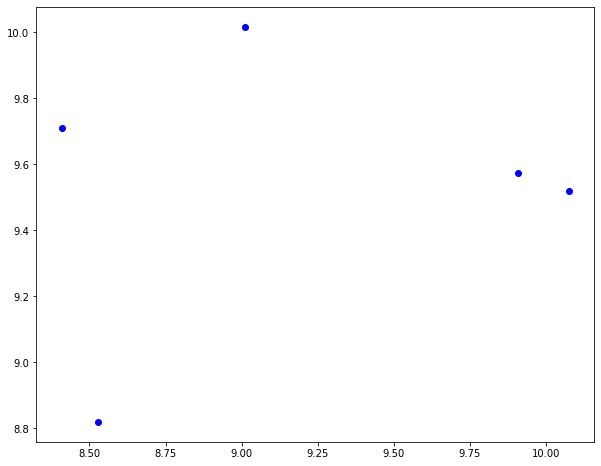

In [ ]:
#menampilkan hnilai asli vs nilai prediksi
plt.figure(figsize=(10,8))
plt.scatter(y_pred, y_test, color = 'blue')
plt.show()